<a href="https://colab.research.google.com/github/ClaudiaGtzD/AprendizajeAutomatico/blob/master/Tarea_05_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed, effective_n_jobs
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score
from numpy import ones, vstack
from numpy.linalg import lstsq

In [2]:
datosGeneracion = pd.read_excel("./Información Planta Solar Estacionaria.xlsx")
datosGeneracion.Fecha = datosGeneracion.Fecha.values.astype(np.int64) / 10 ** 9
datosGeneracion

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,1.625184e+09,2021,199,7,6027,2,144624,0,0.0000,18.0,...,0.0000,-1.0,4,1.0,-2.0,0.0,0,-2.0,0.0,0.0
1,1.625188e+09,2021,199,7,6027,2,144625,1,0.0000,18.0,...,0.0000,0.0,8,0.0,0.0,0.0,0,-2.0,0.0,0.0
2,1.625191e+09,2021,199,7,6027,2,144626,2,0.0000,18.0,...,0.0000,0.0,5,2.0,-2.0,0.0,0,-2.0,0.0,0.0
3,1.625195e+09,2021,199,7,6027,2,144627,3,0.0000,17.0,...,0.0000,-1.0,0,1.0,0.0,0.0,0,-2.0,0.0,-1.0
4,1.625198e+09,2021,199,7,6027,2,144628,4,0.0000,17.0,...,0.0000,0.0,0,7.0,0.0,0.0,0,-2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,1.693508e+09,2023,224,8,6817,31,163603,19,1732.7788,25.2,...,1165.2214,0.6,0,-11.0,-2.5,16.0,0,-5.4,0.0,-3.4
18918,1.693512e+09,2023,224,8,6817,31,163604,20,0.0000,21.5,...,0.0000,2.5,0,-20.0,-1.4,43.0,0,-3.6,-1.4,-2.7
18919,1.693516e+09,2023,224,8,6817,31,163605,21,0.0000,20.8,...,0.0000,2.4,0,-20.0,0.3,33.0,0,-2.8,-1.3,-2.6
18920,1.693519e+09,2023,224,8,6817,31,163606,22,0.0000,18.2,...,0.0000,0.2,0,-28.0,5.8,-9.0,0,5.0,0.0,-6.3


In [3]:
x = datosGeneracion[['Generacion_diff', 'Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff',
                     'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff']]

In [4]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,DireccionViento_diff,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,DPT_diff
0,0.500199,0.447368,0.527950,0.494949,0.444444,0.75,0.375,0.494208,0.507246
1,0.500199,0.473684,0.552795,0.494949,0.444444,0.75,0.375,0.494208,0.507246
2,0.500199,0.473684,0.534161,0.494949,0.444444,0.25,0.375,0.494208,0.507246
3,0.500199,0.447368,0.503106,0.494949,0.444444,0.25,0.375,0.494208,0.492754
4,0.500199,0.473684,0.503106,0.494949,0.444444,0.25,0.375,0.494208,0.521739
...,...,...,...,...,...,...,...,...,...
18917,0.519676,0.489474,0.503106,0.518038,0.444444,0.50,0.250,0.461390,0.457971
18918,0.500199,0.539474,0.503106,0.556999,0.444444,0.50,0.250,0.478764,0.468116
18919,0.500199,0.536842,0.503106,0.542569,0.444444,0.50,0.375,0.486486,0.469565
18920,0.500199,0.478947,0.503106,0.481962,0.444444,0.50,0.375,0.561776,0.415942


In [15]:
kmeans = KMeans(n_clusters = 9, n_init = 'auto').fit(x_scaled)

In [8]:
datosGeneracion["cluster"] = kmeans.labels_
datosGeneracion

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff,cluster
0,1.625184e+09,2021,199,7,6027,2,144624,0,0.0000,18.0,...,-1.0,4,1.0,-2.0,0.0,0,-2.0,0.0,0.0,7
1,1.625188e+09,2021,199,7,6027,2,144625,1,0.0000,18.0,...,0.0,8,0.0,0.0,0.0,0,-2.0,0.0,0.0,7
2,1.625191e+09,2021,199,7,6027,2,144626,2,0.0000,18.0,...,0.0,5,2.0,-2.0,0.0,0,-2.0,0.0,0.0,0
3,1.625195e+09,2021,199,7,6027,2,144627,3,0.0000,17.0,...,-1.0,0,1.0,0.0,0.0,0,-2.0,0.0,-1.0,0
4,1.625198e+09,2021,199,7,6027,2,144628,4,0.0000,17.0,...,0.0,0,7.0,0.0,0.0,0,-2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,1.693508e+09,2023,224,8,6817,31,163603,19,1732.7788,25.2,...,0.6,0,-11.0,-2.5,16.0,0,-5.4,0.0,-3.4,1
18918,1.693512e+09,2023,224,8,6817,31,163604,20,0.0000,21.5,...,2.5,0,-20.0,-1.4,43.0,0,-3.6,-1.4,-2.7,1
18919,1.693516e+09,2023,224,8,6817,31,163605,21,0.0000,20.8,...,2.4,0,-20.0,0.3,33.0,0,-2.8,-1.3,-2.6,1
18920,1.693519e+09,2023,224,8,6817,31,163606,22,0.0000,18.2,...,0.2,0,-28.0,5.8,-9.0,0,5.0,0.0,-6.3,1


In [17]:
kmeans.cluster_centers_

array([[ 5.00017606e-01,  4.62022954e-01,  4.99838564e-01,
         4.75524280e-01,  4.41948116e-01,  4.68061674e-01,
         2.09085903e-01,  5.09941235e-01,  5.13552321e-01],
       [ 5.05435974e-01,  4.73551424e-01,  4.95886518e-01,
         4.34498491e-01,  4.45686799e-01,  2.58027523e-03,
         1.29443807e-01,  4.92219878e-01,  5.22406179e-01],
       [ 5.13599647e-01,  4.87023752e-01,  4.94265037e-01,
         4.99968164e-01,  4.45026940e-01,  2.15159458e-02,
         7.17616863e-01,  5.20341114e-01,  4.99878436e-01],
       [ 5.00677618e-01,  4.68157587e-01,  4.97523528e-01,
         4.98370287e-01,  4.49502342e-01,  4.60772834e-01,
         4.18618267e-01,  5.15509571e-01,  5.13292944e-01],
       [ 4.97738771e-01,  4.56994138e-01,  4.96072978e-01,
         4.78319824e-01,  4.31683424e-01,  8.46287703e-01,
         1.98955916e-01,  5.00840955e-01,  5.14464172e-01],
       [ 5.05537444e-01,  4.74703889e-01,  4.92476022e-01,
         4.88722513e-01,  4.48579117e-01, -3.164135

In [18]:
inercias = []
silhouettes = []
davies_bouldin = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(x_scaled.values)
  inercias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(x_scaled, kmeans.labels_))
  davies_bouldin.append(davies_bouldin_score(x_scaled, kmeans.labels_))

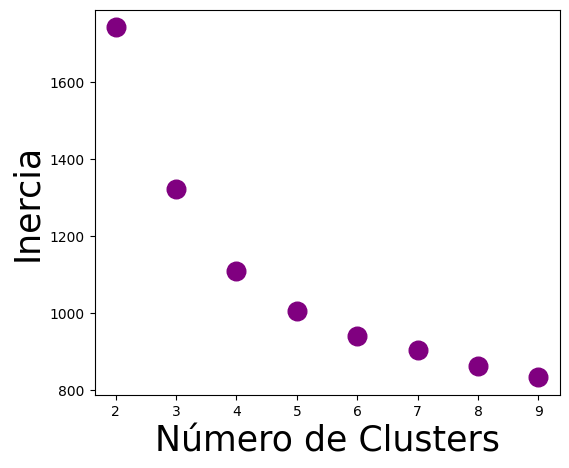

In [19]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.scatter(range(2, 10), inercias, marker = "o", s = 180, color = "purple")
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Inercia", fontsize = 25)
plt.show()

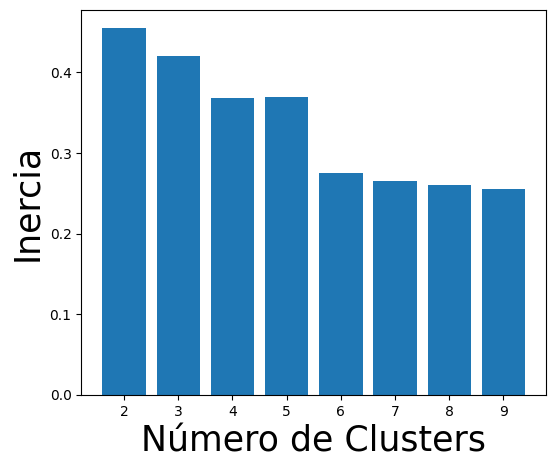

In [20]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.bar(range(2, 10), silhouettes)
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Inercia", fontsize = 25)
plt.show()

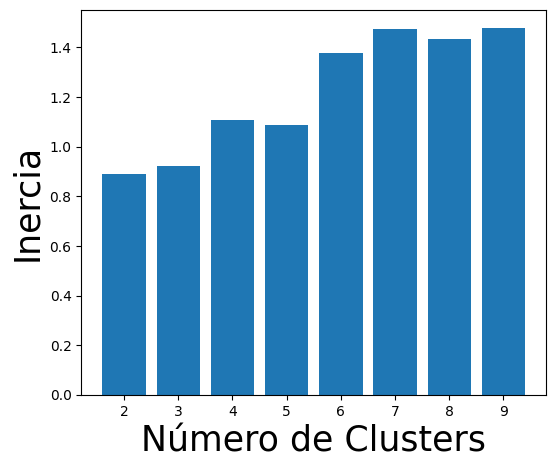

In [21]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.bar(range(2, 10), davies_bouldin)
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Inercia", fontsize = 25)
plt.show()

In [22]:
df_inertias = pd.DataFrame({'n_clusters': range(2, 10), 'inertia': inercias})
df_inertias

,n_clusters,inertia
0,2,1742.659875
1,3,1321.673585
2,4,1109.120935
3,5,1005.722134
4,6,938.527653
5,7,902.045728
6,8,860.804630
7,9,832.537920


In [24]:
points = [(df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
          (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond = None)[0]

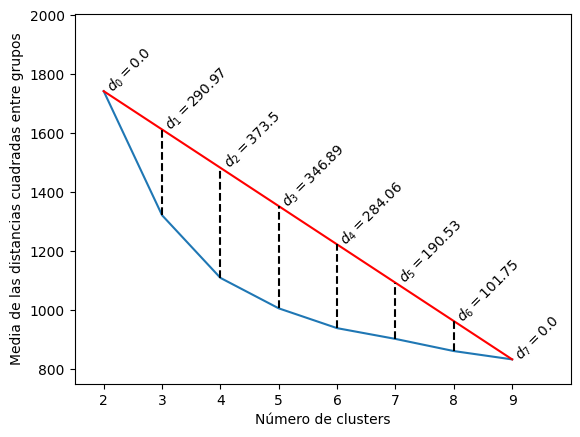

In [27]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c = 'r')
for i, r in df_inertias.iterrows():
  d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
  plt.annotate(d, xytext = (r.n_clusters, m * r.n_clusters + b), xy = (r.n_clusters, m * r.n_clusters + b), rotation = 45)
  plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de clusters')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 10))
plt.ylim((750, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(2, 10))
plt.show()